<a href="https://colab.research.google.com/github/ABG002/Laboratorio3/blob/main/Laboratorio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Inicio del entorno de trabajo</h1>

In [ ]:
! pip install gym-retro
! pip install imutils
! pip install opencv-python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import retro

## Algoritmo de aprendizaje supervisado
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162.0 MB 25 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
! python -m retro.import roms

Imported 0 games


#["B", "A", "MODE", "START", "UP", "DOWN", "LEFT", "RIGHT", "C", "Y", "X", "Z"]
buttons = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
1000 -> 16
 
16
000000001000

<h1>Creando el DataSet</h1>

In [ ]:
def convert_array_to_decimal(keys):
  ints = keys
  string_ints = [str(int) for int in ints]
  string = "".join(string_ints)
  return int(string, 2)

def convet_decimal_to_array(number):
  string_ints = str(np.base_repr(number)).rjust(12,'0')
  return list(map(int, string_ints))

#Carga de los bk's
movie = retro.Movie(
   'records/SonicTheHedgehog-Genesis-GreenHillZone.Act1-0000000.bk2'
    )
movie.step()

try:
  env = retro.make(
    game= movie.get_game(),
    state=None,
    use_restricted_actions=retro.Actions.ALL,
    players=movie.players,
  )
  env.initial_state = movie.get_state()
  world = np.asarray(env.reset()).reshape(-1)
  target = np.array([0])
  while movie.step():
    img = np.asarray(env.render(mode='rgb_array')).reshape(-1)
    world = np.vstack((world,img))
    keys = []
    for p in range(movie.players):
      for i in range(env.num_buttons):
        keys.append(movie.get_key(i,p))
    keys = [int(elem) for elem in keys]
    number = convert_array_to_decimal(keys)
    target = np.append(target,number)
    ob, rew, done, info = env.step(keys)

except Exception as e:
  print(e)
  env.close()

RuntimeError: ignored

In [ ]:
target

NameError: ignored

<h1>Inicio del entrenamiento</h1>

En esta sección se entrena al modelos segun los diferentes escenarios. 

In [ ]:
clf = svm.SVC(gamma=0.001)
X_train, X_test, Y_train, Y_test = train_test_split(world, target, test_size=0.25, shuffle=True)

NameError: ignored

In [ ]:
clf.fit(X_train, Y_train)

NameError: ignored

Se procede a guardar el modelo ya entrenado en una carpeta

In [ ]:
import pickle
filename = 'modelo_finalizado1.sav'
pickle.dump(clf, open(filename, 'wb'))

También se guardan los datos de prueba para no gastar el tiempo entrenando el modelo nuevamente.

In [ ]:
filename_XTest = 'XTest2.sav'
filename_XTrain = 'XTrain2.sav'
filename_YTest = 'YTest2.sav'
filename_YTrain = 'YTrain2.sav'
pickle.dump(X_test, open(filename_XTest, 'wb'))
pickle.dump(Y_test, open(filename_YTest, 'wb'))
pickle.dump(X_train, open(filename_XTrain, 'wb'))
pickle.dump(Y_train, open(filename_YTrain, 'wb'))

NameError: ignored

<h1>Evaluación del modelo SVM

In [ ]:
! pip install gym-retro
! pip install imutils
! pip install opencv-python
! python -m retro.import roms
 
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import retro
 
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
 
import pickle
filename = 'modelo_finalizado1.sav'
filename_XTEST = 'XTest2.sav'
filename_YTEST = 'YTest2.sav'
filename_XTRAIN = 'XTrain2.sav'
filename_YTRAIN = 'YTrain2.sav'
#loaded_model = pickle.load(open(filename, 'rb'))
xtest = pickle.load(open(filename_XTEST, 'rb'))
ytest = pickle.load(open(filename_YTEST, 'rb'))
xtrain = pickle.load(open(filename_XTRAIN, 'rb'))
ytrain = pickle.load(open(filename_YTRAIN, 'rb'))



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Imported 0 games


FileNotFoundError: ignored

In [ ]:

loaded_model = pickle.load(open(filename, 'rb'))
 
disp = metrics.plot_confusion_matrix(loaded_model, xtest, ytest)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
 
plt.show()

FileNotFoundError: ignored

<h1>Ejecución

KeyboardInterrupt: ignored

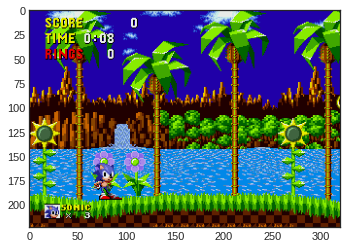

In [ ]:
import retro

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
 
# Procesamento de imagenes
from skimage.transform import resize
from skimage.color import rgb2gray
from IPython import display

def convert_from_decimal_to_array(number):
  string_ints = str(np.base_repr(number)).rjust(12, '0')
  return list(map(int, string_ints))

done = False
try:
  env = retro.make('SonicTheHedgehog-Genesis', 'GreenHillZone.Act1')
  observation = env.reset()
  img = plt.imshow(env.render(mode='rgb_array'))
  while not done:
      world = env.render(mode='rgb_array')
      world_data = np.asarray(world).reshape(-1)
      img.set_data(world)
      display.display(plt.gcf())
      display.clear_output(wait=True)
      predicted = loaded_model.predict([world_data])
      action = convert_from_decimal_to_array(predicted[0])
      ob, rew, done, info = env.step(action)
      #print("Action ", action, "Reward ", rew)
except Exception as e:
  print(e)
  env.close()

<h1>Regresión Lineal 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


ValueError: ignored

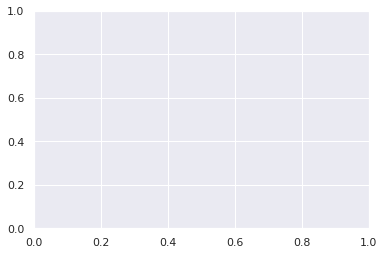

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize=True)

reg.fit(xtrain, ytrain)
prediction_linear = reg.predict(xtest) 

plt.scatter(xtest, ytest, color="black")
plt.plot(xtest, ytrain, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

<h1>Matriz de confusión

In [ ]:
 
disp = metrics.plot_confusion_matrix(prediction_linear, xtest, ytest)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
 
plt.show()

ValueError: ignored

[1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1]


KeyboardInterrupt: ignored

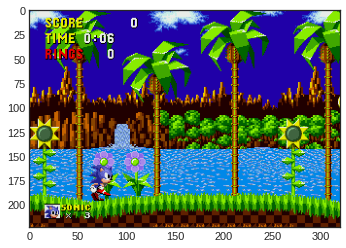

In [ ]:
! pip install scikit-image

import retro

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
 
# Procesamento de imagenes
from skimage.transform import resize
from skimage.color import rgb2gray
from IPython import display

def convert_from_decimal_to_array(number):
  string_ints = str(np.base_repr(abs(int(number)))).rjust(12, '0')
  return list(map(int, string_ints))

done = False
try:
  env = retro.make('SonicTheHedgehog-Genesis', 'GreenHillZone.Act1')
  observation = env.reset()
  img = plt.imshow(env.render(mode='rgb_array'))
  while not done:
      world = env.render(mode='rgb_array')
      world_data = np.asarray(world).reshape(-1)
      img.set_data(world)
      display.display(plt.gcf())
      display.clear_output(wait=True)
      predicted = reg.predict([world_data])
      action = convert_from_decimal_to_array(predicted[0])
      print(action)
      ob, rew, done, info = env.step(action)
      #print("Action ", action, "Reward ", rew)
except Exception as e:
  print(e)
  env.close()

<h1> Regresión Lógica

In [ ]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(random_state=0)
logi.fit(xtrain, ytrain)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h1></h1>

In [ ]:
! pip install scikit-image

import retro

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
 
# Procesamento de imagenes
from skimage.transform import resize
from skimage.color import rgb2gray
from IPython import display

def convert_from_decimal_to_array(number):
  string_ints = str(np.base_repr(abs(int(number)))).rjust(12, '0')
  return list(map(int, string_ints))

done = False
try:
  env = retro.make('SonicTheHedgehog-Genesis', 'GreenHillZone.Act1')
  observation = env.reset()
  img = plt.imshow(env.render(mode='rgb_array'))
  while not done:
      world = env.render(mode='rgb_array')
      world_data = np.asarray(world).reshape(-1)
      img.set_data(world)
      display.display(plt.gcf())
      display.clear_output(wait=True)
      predicted = logi.predict([world_data])
      action = convert_from_decimal_to_array(predicted[0])
      print(action)
      ob, rew, done, info = env.step(action)
      #print("Action ", action, "Reward ", rew)
except Exception as e:
  print(e)
  env.close()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ModuleNotFoundError: ignored

<h1> Bayesianos Ingenuos

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB


gnb = GaussianNB()
bern = BernoulliNB()

gnb.fit(xtrain, ytrain)
bern.fit(xtrain, ytrain)

predicted_bern= bern.predict(xtest)
predicted_gnb = gnb.predict(xtest)

<h1>Matriz de confusión

Confusion matrix:
[[ 38   6   0]
 [102 104 139]
 [  3   0   5]]


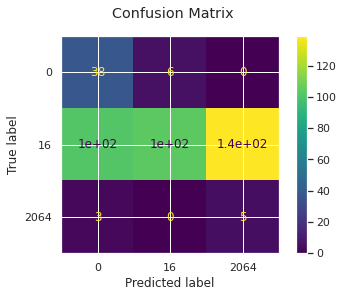

In [ ]:
disp = metrics.plot_confusion_matrix(bern, xtest, ytest)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

KeyboardInterrupt: ignored

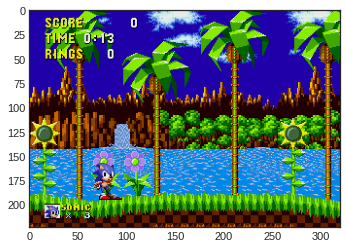

In [ ]:
! pip install scikit-image

import retro

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
 
# Procesamento de imagenes
from skimage.transform import resize
from skimage.color import rgb2gray
from IPython import display

def convert_from_decimal_to_array(number):
  string_ints = str(np.base_repr(abs(int(number)))).rjust(12, '0')
  return list(map(int, string_ints))

done = False
try:
  env = retro.make('SonicTheHedgehog-Genesis', 'GreenHillZone.Act1')
  observation = env.reset()
  img = plt.imshow(env.render(mode='rgb_array'))
  while not done:
      world = env.render(mode='rgb_array')
      world_data = np.asarray(world).reshape(-1)
      img.set_data(world)
      display.display(plt.gcf())
      display.clear_output(wait=True)
      predicted = bern.predict([world_data])
      action = convert_from_decimal_to_array(predicted[0])
      print(action)
      ob, rew, done, info = env.step(action)
      #print("Action ", action, "Reward ", rew)
except Exception as e:
  print(e)
  env.close()

<h1> Arboles de toma de desiciones

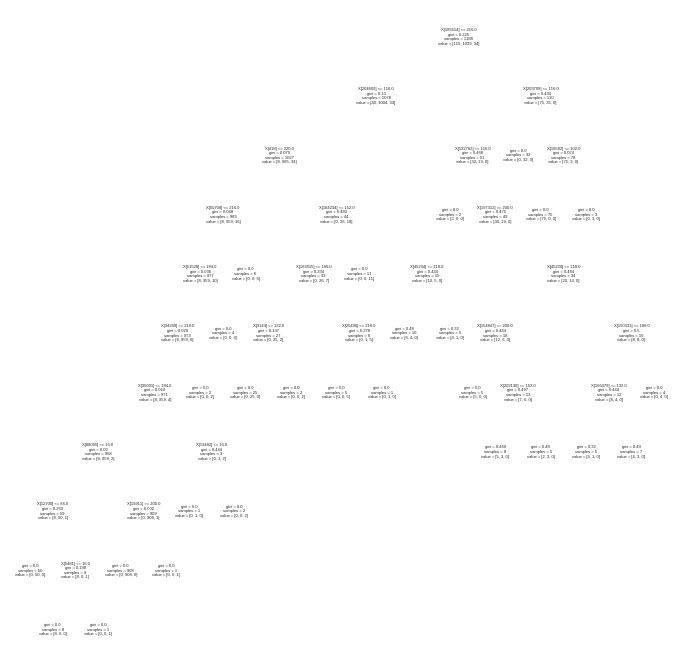

In [ ]:
from sklearn import tree
arbol = tree.DecisionTreeClassifier()
arbol.fit(xtrain, ytrain)

plt.figure(figsize=(12,12))
tree.plot_tree(arbol)
plt.savefig('tree_high_dpi', dpi=200) 

predicted_arbol = arbol.predict(xtest)

<h1>Matriz de confusión

Confusion matrix:
[[ 44   0   0]
 [  2 332  11]
 [  0   7   1]]


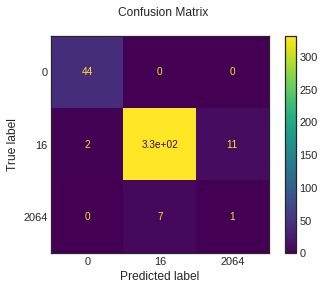

In [ ]:
disp = metrics.plot_confusion_matrix(arbol, xtest, ytest)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


KeyboardInterrupt: ignored

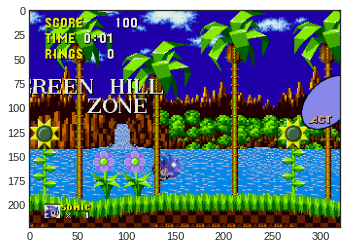

In [ ]:
! pip install scikit-image

import retro

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
 
# Procesamento de imagenes
from skimage.transform import resize
from skimage.color import rgb2gray
from IPython import display

def convert_from_decimal_to_array(number):
  string_ints = str(np.base_repr(abs(int(number)))).rjust(12, '0')
  return list(map(int, string_ints))

done = False
try:
  env = retro.make('SonicTheHedgehog-Genesis', 'GreenHillZone.Act1')
  observation = env.reset()
  img = plt.imshow(env.render(mode='rgb_array'))
  while not done:
      world = env.render(mode='rgb_array')
      world_data = np.asarray(world).reshape(-1)
      img.set_data(world)
      display.display(plt.gcf())
      display.clear_output(wait=True)
      predicted = arbol.predict([world_data])
      action = convert_from_decimal_to_array(predicted[0])
      print(action)
      ob, rew, done, info = env.step(action)
      #print("Action ", action, "Reward ", rew)
except Exception as e:
  print(e)
  env.close()